<a href="https://colab.research.google.com/github/evertonrca/Data-Science-Projects/blob/main/BankChurn_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [234]:
%pip install imbalanced-learn
!pip install chart_studio
!pip install plotly==4.14.1

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import chart_studio.grid_objs
import plotly
import plotly.express as px

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import mutual_info_classif, SelectKBest, SelectPercentile, chi2
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
import pickle



from imblearn.over_sampling import SMOTE
sns.set_style('darkgrid')

# Importando banco de dados

In [236]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Kaggle/BankChurners/BankChurners.csv')

# Explorando banco de dados

In [237]:
df.shape

(10127, 23)

In [238]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [239]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
         'CLIENTNUM'],
        axis=1, inplace=True)

In [240]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [241]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [242]:
df.isnull().value_counts()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  Income_Category  Card_Category  Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio
False           False         False   False            False            False           False            False          False           False                     False                   False                  False         False                False            False                 False            False           False                False                    10127
dtype: int64

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Explorando via gráficos

In [244]:
fig = make_subplots(rows= 1, cols=1)

graf1 = go.Box(x = df.Customer_Age, 
               boxmean = True, 
               name = '',
               fillcolor = 'azure',
               line = dict(color = 'black'),
               marker = dict(color = 'red', symbol = 'circle')
               )

fig.update_layout(height=500, width=1300, 
                  title_text="<b>Distribuição da idade dos consumidores",
                  title_x = .5,
                  xaxis_title = '<b>Idade',
                  title_font_size = 20,
                  plot_bgcolor='#F5F5F5')

fig.add_trace(graf1, row=1, col=1)

fig.show(renderer = 'colab')

In [245]:
HIST_DATA = [df.Customer_Age] 
group_labels=['Idade']
fig = ff.create_distplot(HIST_DATA, 
                         group_labels,
                         bin_size = 1
                         )

fig.update_layout(title = '<b>Distribuição de idade dos consumidores',
                  title_x = .45,
                  xaxis_title = '<b>Idade',
                  plot_bgcolor='#F5F5F5',
                  title_font_size = 20)

fig.update_traces(marker_line_width = 1.5)

fig.show(renderer = 'colab')

# Alguns gráficos gerais de pizza 

In [246]:
#fig = make_subplots(rows=2, cols=1)
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Nº de Dependentes', 'Gênero dos Consumidores'])

labels1 = df.Dependent_count.value_counts().index
labels2 = df.Gender.value_counts().index

graf1 = go.Pie(values=df.Dependent_count.value_counts().values, 
               labels=labels1, name = 'Dependentes', 
               scalegroup='one'
               )

graf2 = go.Pie(values=df.Gender.value_counts().values, 
               labels=labels2, 
               name = 'Gênero', 
               scalegroup='one'
               )

fig.update_layout(height = 800, 
                  width = 1100, 
                  title_text='<b>Número de Dependencias e Gênero de Consumidores',
                  title_x = 0.5, 
                  showlegend = True,
                  title_font_size = 20)
                  


fig.add_trace(graf1, row=1, col=1)
fig.add_trace(graf2, row=1, col=2)

fig.update_traces(marker=dict(line=dict(color='#000000', width=1.0)))


fig.show(renderer = 'colab')

In [247]:
# Gráfico de Nível educacional

nivel = df.Education_Level.value_counts().index

data = go.Pie(values=df.Education_Level.value_counts().values, 
              name='Nível Educacional', 
              labels=nivel,
              pull=[0.05, 0, 0, 0, 0, 0, 0],
              )
fig = go.Figure(data=data)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.0)))

fig.update_layout(title = '<b>Nível Educacional',
                  title_y = .9,
                  title_x = .475,
                  title_font_size = 20)

fig.show(renderer='colab')

In [248]:
#fig = make_subplots(rows=2, cols=1)
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Categoria de Renda', 'Tipo de cartão'])




graf1 =  go.Pie(values=df.Income_Category.value_counts().values, 
               labels=df.Income_Category.value_counts().index,
                name = 'Categoria',
                scalegroup = 'one')

graf2 = go.Pie(values=df.Card_Category.value_counts().values, 
               labels=df.Card_Category.value_counts().index, 
               name = 'Cartão', 
               scalegroup='one'
               )

fig.update_layout(height = 800, 
                  width = 1100, 
                  title_text='<b>Categoria de Renda',
                  title_x = 0.5, 
                  showlegend = True,
                  title_font_size = 20)
                  


fig.add_trace(graf1, row=1, col=1)
fig.add_trace(graf2, row=1, col=2)

fig.update_traces(marker=dict(line=dict(color='#000000', width=1.0)))


fig.show(renderer = 'colab')

In [249]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Gráficos combinados

In [250]:
# Comparando com Categoria de Churn (sim ou não)
fig = px.histogram(df, x = 'Gender',
                   barmode = 'group',
                   color = 'Attrition_Flag'
                   )
   
fig.update_layout(width = 1000,
                  height = 600,
                  title = '<b>Relação Churn e Gênero',
                  title_x = 0.5,
                  plot_bgcolor='#F5F5F5'
                  )

fig.update_layout({'legend_title':'<b>Categoria'})

fig.update_traces(marker_line_width = 1.5)

fig.show(renderer = 'colab')

In [251]:
fig = px.histogram(df, x = df.Education_Level,
                    color = df.Attrition_Flag,
                    barmode = 'group')

fig.update_layout(width = 1000,
                  height = 600,
                  title = '<b>Relação Churn e Nível Educacional',
                  title_x = 0.45,
                  plot_bgcolor='#F5F5F5',
                  xaxis_title = 'Nível Educacional'
                  )


fig.update_layout({'legend_title':'<b>Categoria'})

fig.update_traces(marker_line_width = 1.5)


fig.show(renderer = 'colab')


In [252]:
# Gráfico para churn e categoria de cartão
fig = px.histogram(x = df.Card_Category,
                   color = df.Attrition_Flag,
                   barmode = 'group',
                   )

fig.update_layout(title = '<b>Relação Churn e Categoria de Cartão',
                  title_x = .5,
                  plot_bgcolor='#F5F5F5',
                  width = 1000,
                  height = 600,
                  legend_title = '<b>Categoria',
                  xaxis_title = 'Categoria do Cartão'
                  )

fig.update_traces(marker_line_width = 1.5)

fig.show(renderer = 'colab')

In [253]:
# Gráfico de renda por categoria de renda

fig = px.histogram(x = df.Income_Category,
                   color = df.Attrition_Flag,
                   barmode = 'group',
                   )

fig.update_layout(width = 1000,
                  height = 600,
                  legend_title = '<b>Categoria',
                  title = '<b>Relação Churn e Categoria de Renda',
                  title_x = 0.45,
                  xaxis_title = 'Categoria de renda',
                  plot_bgcolor='#F5F5F5',
                  )

fig.update_traces(marker_line_width = 1.5)

fig.show(renderer = 'colab')

In [254]:
fig = px.histogram(x = df.Marital_Status,
                   color = df.Attrition_Flag,
                   barmode = 'group',
                   )

fig.update_layout(title = '<b>Relação Churn e Estado Civil',
                  title_x = 0.45,
                  plot_bgcolor='#F5F5F5',
                  legend_title = '<b>Estado Civil',
                  width = 1000,
                  height = 600,
                  xaxis_title = 'Estado Civil'
                  )

fig.update_traces(marker_line_width = 1.5)

fig.show(renderer = 'colab')

In [255]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [256]:
df_distplot = df.iloc[:,12:]
df_distplot

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...
10122,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [257]:
listando = df.iloc[:, 12:].columns

def plot_hist (val1, val2, lista):
  fig, localizacao = plt.subplots(val1, val2, figsize = (22,15),)

  

  coluna = 0
  for x in range(val1):
    for y in range(val2):
      sns.distplot(df_distplot.loc[:, lista[coluna]],
                  kde = True,
                  ax = localizacao[x,y],
                  color = "#3CB371"          
                  )
      localizacao[x][y].set_title(lista[coluna])
      coluna += 1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

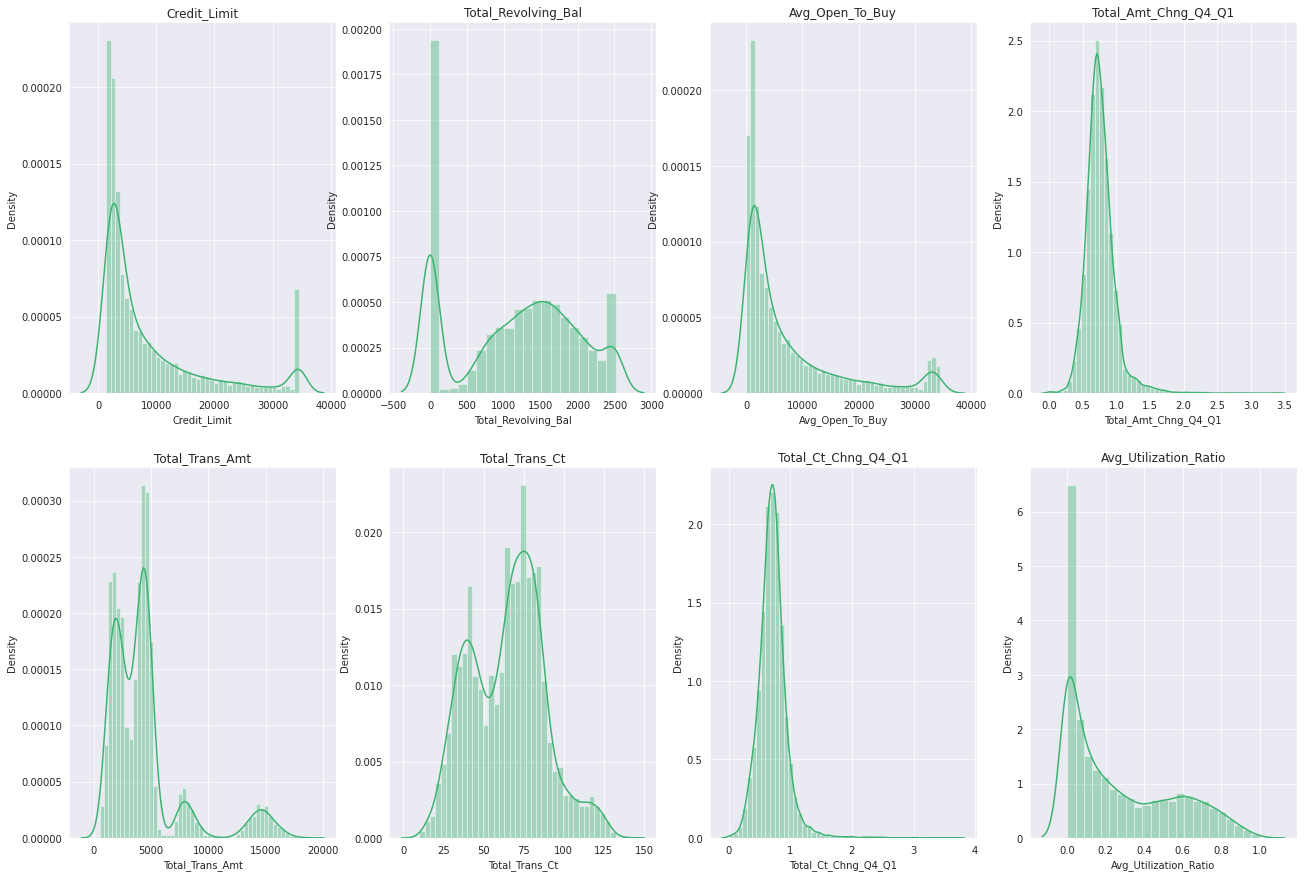

In [258]:
plot_hist(2,4, listando)

In [259]:
correlacoes = df.corr()

In [260]:
z = np.array(correlacoes).round(2)
x = correlacoes.columns.to_list()
y = correlacoes.index.to_list()

# Invertendo matrizes (Por algum motivo o gráfico de heatmap do ff inverte o Y)
z = z[::-1]
y = y[::-1]

fig = ff.create_annotated_heatmap(z,
                                  x = x,
                                  y = y,
                                  showscale=True,
                                  #reversescale=True,
                                  colorscale = 'Greens'                                  
                                  )

for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 10

fig.update_layout(title = '<b> Gráfico de Correlação de Variáveis',
                  title_x = 0.5,
                  title_y = 1)
#fig.update_annotations()

fig.show(renderer = 'colab')

# Iniciando o treinamento dos modelo

#### Aplicando o label encoder para as variáveis categóricas

In [261]:
encoder = LabelEncoder()
df_numerico = df.copy()

# Buscando colunas que necessitam do label encoder
colunas_selecionadas = df[df.select_dtypes(['object']).columns].columns

# Criando uma função que transforme as colunas em inteiros
def encoder_coluna (lista):
  for coluna in lista:
    df_numerico[coluna] = encoder.fit_transform(df_numerico[coluna])
  
  return



In [262]:
# Aplicando a função à lista criada
encoder_coluna(colunas_selecionadas)
df_numerico.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#### Separando em treino e teste

In [263]:
# Treino e teste
treino = df_numerico.drop(['Attrition_Flag'], axis=1)
classe = df_numerico['Attrition_Flag']

#### Criando os algoritmos que serão utilizados

In [265]:
# Criando pipelines de todos os algoritmos:
pip_1 = ['KNN', Pipeline([('Scaler_KNN', 
                          StandardScaler()), 
                          ('clf', KNeighborsClassifier())
                          ])]
pip_2 = ['SVM', Pipeline([('Scaler_SVM',
                           StandardScaler()),
                          ('clf', KNeighborsClassifier())
                          ])]
pip_3 = ['Gaussian', Pipeline([('Scaler_Gaussian',
                                StandardScaler()),
                               ('clf', GaussianNB())
                               ])]
pip_4 = ['Decision Tree', Pipeline([('Scaler_Decision',
                                     StandardScaler()),
                                    ('clf', DecisionTreeClassifier())
                                    ])]
pip_5 = ['Random Forest', Pipeline([('Scaler_Random',
                                     StandardScaler()),
                                    ('clf', RandomForestClassifier())
                                    ])]

pipelines = [pip_1, pip_2, pip_3, pip_4, pip_5]
lista_resultados = []
lista_nome = []
tempo_treino = []

# Aplicando as pipelines aos classificadores:
contador = 0
for nome, modelo in pipelines:
  contador += 1
  k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  predicoes = cross_val_predict(modelo, treino, classe, cv = k_fold)
  acuracia = cross_val_score(modelo, treino, classe, cv = k_fold)

  print(f'{contador} - Modelo testado: {nome}', f'\nAcurácia do modelo: {acuracia.mean().round(4)}\n')
  print(f'Report do modelo:\n {classification_report(classe, predicoes)}\n\n')


  lista_nome.append(nome)
  lista_resultados.append(acuracia.mean().round(4)) 

1 - Modelo testado: KNN 
Acurácia do modelo: 0.9064

Report do modelo:
               precision    recall  f1-score   support

           0       0.81      0.54      0.65      1627
           1       0.92      0.98      0.95      8500

    accuracy                           0.91     10127
   macro avg       0.86      0.76      0.80     10127
weighted avg       0.90      0.91      0.90     10127



2 - Modelo testado: SVM 
Acurácia do modelo: 0.9064

Report do modelo:
               precision    recall  f1-score   support

           0       0.81      0.54      0.65      1627
           1       0.92      0.98      0.95      8500

    accuracy                           0.91     10127
   macro avg       0.86      0.76      0.80     10127
weighted avg       0.90      0.91      0.90     10127



3 - Modelo testado: Gaussian 
Acurácia do modelo: 0.887

Report do modelo:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      1627
           1 

**As métricas alcançadas no modelo Random Forest já são suficientes, porém vou testar mais duas ténicas por curiosade, uma inserindo somente as melhores features e outra utilizando o GridSearch para melhorar parâmetros**

In [223]:
# Identificando features mais importantes:
best = SelectKBest(mutual_info_classif, k=15).fit(treino, classe)
X_train.columns[best.get_support()]
melhores = list(treino.columns[best.get_support()])
melhores

['Education_Level',
 'Marital_Status',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [224]:
# Nível de importância
best_features = pd.Series(best.scores_, index=treino.columns).sort_values(ascending=False)
print(best_features)

Total_Trans_Amt             0.159121
Total_Trans_Ct              0.110569
Total_Ct_Chng_Q4_Q1         0.091099
Total_Revolving_Bal         0.083385
Avg_Utilization_Ratio       0.046744
Contacts_Count_12_mon       0.034361
Total_Amt_Chng_Q4_Q1        0.030817
Months_Inactive_12_mon      0.022875
Avg_Open_To_Buy             0.019555
Total_Relationship_Count    0.008071
Credit_Limit                0.006879
Card_Category               0.001973
Marital_Status              0.001959
Education_Level             0.001228
Months_on_book              0.000000
Income_Category             0.000000
Dependent_count             0.000000
Gender                      0.000000
Customer_Age                0.000000
dtype: float64


In [225]:
# Treinando o modelo com as features mais importantes:

treino_melhores = df_numerico[melhores]


pip_1 = ['KNN', Pipeline([('Scaler_KNN', 
                          StandardScaler()), 
                          ('clf', KNeighborsClassifier())
                          ])]
pip_2 = ['SVM', Pipeline([('Scaler_SVM',
                           StandardScaler()),
                          ('clf', KNeighborsClassifier())
                          ])]
pip_3 = ['Gaussian', Pipeline([('Scaler_Gaussian',
                                StandardScaler()),
                               ('clf', GaussianNB())
                               ])]
pip_4 = ['Decision Tree', Pipeline([('Scaler_Decision',
                                     StandardScaler()),
                                    ('clf', DecisionTreeClassifier())
                                    ])]
pip_5 = ['Random Forest', Pipeline([('Scaler_Random',
                                     StandardScaler()),
                                    ('clf', RandomForestClassifier())
                                    ])]

pipelines = [pip_1, pip_2, pip_3, pip_4, pip_5]
lista_resultados = []
lista_nome = []

# Aplicando as pipelines aos classificadores:
contador = 0
for nome, modelo in pipelines:
  contador += 1
  k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  predicoes = cross_val_predict(modelo, treino_melhores, classe, cv = k_fold)
  acuracia = cross_val_score(modelo, treino_melhores, classe, cv = k_fold)

  print(f'{contador} - Modelo testado: {nome}', f'\nAcurácia do modelo: {acuracia.mean().round(4)}\n')
  print(f'Report do modelo:\n {classification_report(classe, predicoes)}\n\n')

  lista_nome.append(nome)
  lista_resultados.append(acuracia.mean().round(4)) 


1 - Modelo testado: KNN 
Acurácia do modelo: 0.9161

Report do modelo:
               precision    recall  f1-score   support

           0       0.83      0.60      0.70      1627
           1       0.93      0.98      0.95      8500

    accuracy                           0.92     10127
   macro avg       0.88      0.79      0.82     10127
weighted avg       0.91      0.92      0.91     10127



2 - Modelo testado: SVM 
Acurácia do modelo: 0.9161

Report do modelo:
               precision    recall  f1-score   support

           0       0.83      0.60      0.70      1627
           1       0.93      0.98      0.95      8500

    accuracy                           0.92     10127
   macro avg       0.88      0.79      0.82     10127
weighted avg       0.91      0.92      0.91     10127



3 - Modelo testado: Gaussian 
Acurácia do modelo: 0.8837

Report do modelo:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      1627
           1

**O modelo de melhor desempenho foi o Random Forest**

# Treinando o modelo de Floresta Aleatória

In [168]:
# Identificando as configurações do modelo padrão de melhor desempenho
modelo1 = RandomForestClassifier()
modelo1

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [187]:
# Criando configurações diferentes 
criterion = ['gini', 'entropy']
max_depth = [5, 10, 15, 20, 30, 50]
n_estimators = [30, 50, 100, 120, 150]

parametros_grid = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion)
parametros_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 15, 20, 30, 50],
 'n_estimators': [30, 50, 100, 120, 150]}

In [188]:
# Aplicando o StandardScaler
escaler = StandardScaler()
treino_scaler = escaler.fit_transform(treino_melhores)

# Iniciando o grid
modelo_random = RandomForestClassifier()
grid = GridSearchCV(modelo_random, 
                    param_grid=parametros_grid, 
                    scoring='accuracy', 
                    cv = k_fold,
                    )
grid.fit(treino_scaler, classe)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                           

In [189]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
print(f' Melhores parâmetros para o Decision Tree: \n{grid.best_params_}')

 Melhores parâmetros para o Decision Tree: 
{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 120}


In [191]:
print(f' Melhor score para o Decision Tree: {grid.best_score_.round(4)*100}%')

 Melhor score para o Decision Tree: 96.50999999999999%


# Treino do modelo final Random Forest para criação da persistência do modelo

In [229]:
# Criando o modelo 
random = RandomForestClassifier(criterion='gini',
                                max_depth=50,
                                n_estimators = 120)

random.fit(X = treino_scaler, y = classe)
resultado = cross_val_predict(estimator = random, X = treino_scaler, y = classe, cv=k_fold)
resultado_acuracia = cross_val_score(estimator = random, X = treino_scaler, y = classe, cv=k_fold)

# Acurácia
print(f'Valor de acurácia: {resultado_acuracia.mean().round(2)*100}%\n\n')

# Report
print(f'Report:\n{classification_report(classe, resultado)}\n\n')

# Matriz Confusão
print ('Matriz confusão:\n',pd.crosstab(classe, resultado, rownames=['Real'], colnames=['         Predito'], margins=True))

Valor de acurácia: 97.0%


Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1627
           1       0.97      0.99      0.98      8500

    accuracy                           0.96     10127
   macro avg       0.95      0.91      0.93     10127
weighted avg       0.96      0.96      0.96     10127



Matriz confusão:
          Predito     0     1    All
Real                               
0                 1370   257   1627
1                  110  8390   8500
All               1480  8647  10127


#### Persistência do modelo


In [232]:
#Salvando modelo como Arvore_Decisao.sav
pickle.dump(random, open('Churn_RandomForest.sav', 'wb'))
pickle.load(open('Churn_RandomForest.sav', 'rb'))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)